**Loadng the MNIST dataset**

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train.shape #shape of the training set

(60000, 28, 28)

**We have calculated the mean, stanndard devaitions, covariance matrices and prior probabilities of each of the classes and stored them in an individual groupwise list. Images of each class is genreated from mean and standard deviation matrices**

Mean and SD for digit  0  is 


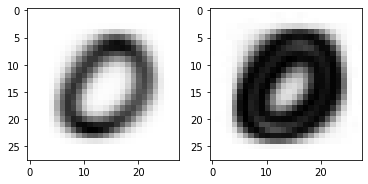

Mean and SD for digit  1  is 


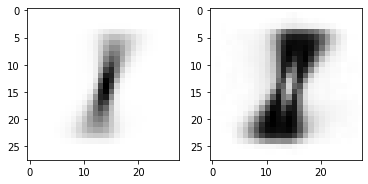

Mean and SD for digit  2  is 


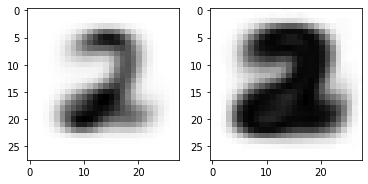

Mean and SD for digit  3  is 


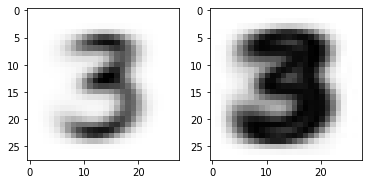

Mean and SD for digit  4  is 


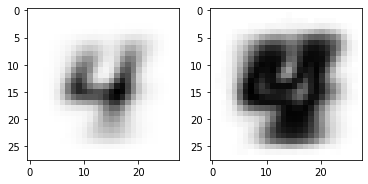

Mean and SD for digit  5  is 


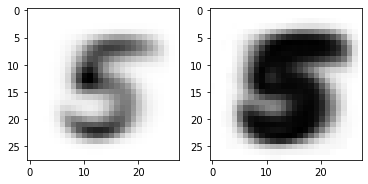

Mean and SD for digit  6  is 


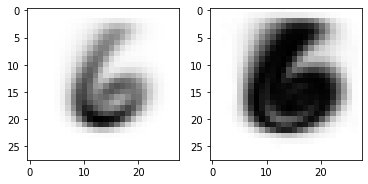

Mean and SD for digit  7  is 


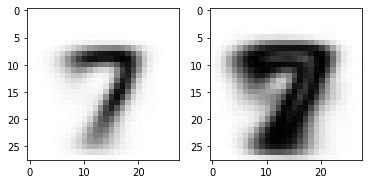

Mean and SD for digit  8  is 


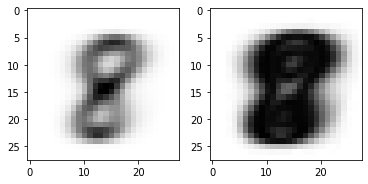

Mean and SD for digit  9  is 


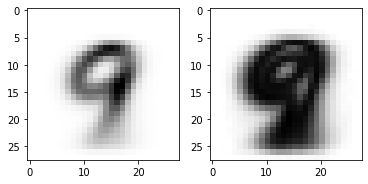

In [4]:
mean_list=[] #meanlist
sd_list=[] #standard devaition list
co_var=[]  #covariance list
prior_p=[] #prior proababiliti list

for i in range(0,10):
    l=[]
    for j in range(len(x_train)):
        if(y_train[j]==i):
            l.append(x_train[j].reshape(784))
    prior_p.append(len(l)/60000) #calculating the prior probability fo each class adnd appending to the list
    
    l=np.array(l)
    m=np.mean(l,axis=0) #calculating the mean
    s=np.std(l,axis=0)  #calculating the standard deviation
    c_v=np.cov(l.T)     #calculating the covariance 
    
    np.fill_diagonal(c_v,c_v.diagonal()+0.1)   #adding noise to diagonal elements
    
    mean_list.append(m)  #appending mean to mean_list
    sd_list.append(s)    #appending standard deviatiob to sd_list
    co_var.append(c_v)   #appending covariance to list
    
    #generating images from the mean and standard devaition of each class
    print("Mean and SD for digit ",i," is ")
    f=plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(m.reshape(28,28), cmap='Greys')
    f.add_subplot(1,2,2)
    plt.imshow(s.reshape(28,28), cmap='Greys')
    plt.show(block=True)
    

In [5]:
y_train.shape

(60000,)

In [6]:
len(prior_p)
len(co_var)

10

In [7]:
mean_list[0].shape,sd_list[0].shape,co_var[0].shape


((784,), (784,), (784, 784))

**Assuming the distribution of each class to be Gaussian <br>**

$\frac{1}{(2\pi)^{(d/2)}{\det{\sum}}^{1/2}}\exp(-1/2(x-\mu)^{T}\sum^{-1}(x-\mu))$

where $\sum$ is the covariance matrix, $\mu$ is the mean of the respective class.

**We calculate the discriminant function using the following equations :**

$g_i(x)=\log(p|w_i)+\log(P(w_i))$

$g_i(x)=-\frac{1}{2}(x-\mu_i)^{T}\sum_i^{-1}(x-\mu_i) - \frac{d}{2}\log{(2\pi)} -\frac{1}{2}\log{\det{\sum_i}} + \log{P(w_i)}$

**Using the third case where the covariance matrices are different for each class, the discriminant function reduces to :**

$g_i(x)=x^tW_ix+N^t_ix+B_{i0}$

$W_i= -1/2 {\sum }_i^{-1}$

$ N_i=  {\sum }_i^{-1} \mu_i $

$ B_{i0}= -1/2 \mu_i^t{\sum }_i^{-1}  \mu_i +\ln P(\omega_i) -1/2\ln \left | {\sum }_i \right |$

$P(w_i)$ is the prior probability of each of the 10 classes 0 to 9.

In [8]:
W_i=[]
N_i=[]
B_i=[]
for i in range(10):
        
        sign,det=np.linalg.slogdet(co_var[i])
        W_i.append(-1/2*np.linalg.inv(co_var[i]))
        N_i_x=np.matmul(np.linalg.inv(co_var[i]),mean_list[i])
        N_i.append(N_i_x)
        B_i.append(-1/2*np.matmul(mean_list[i].T,N_i_x)-1/2*det+np.log(prior_p[i]))
        

In [9]:
len(W_i),len(N_i),len(B_i)

(10, 10, 10)

In [10]:
def testing(x):
    s=[]
    for i in range(10):
            G=np.matmul(np.matmul(x.T,W_i[i]),x)+np.matmul(N_i[i].T,x)+B_i[i]
        
            s.append(G)
        
    return (np.argmax(np.array(s)))

In [11]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [12]:
accuracy=0
loss=0
for i in range(len(x_test)):
    temp=x_test[i].reshape(784,1)
    label=testing(temp)
    if(label==y_test[i]):
        accuracy+=1
    else:
        loss+=1

        

In [13]:
print("Test accuracy is",accuracy/10000*100)

Test accuracy is 81.08999999999999


In [14]:
print("Test Loss is",loss/10000*100)

Test Loss is 18.91


**We are calculating the 0-1 loss, where if the sample is correctly classified then loss is 0 else loss is 1. Other classification methods in LeCun's website shows the error rate to be mostly as low as 1% with a high of 12%. Using the QDA our error rate is not good, having an error rate of 18.91%.**

**QDA a variant of Linear Discriminant Analysis(LDA) which is used for non-linear classification of data.  <br> 
However the discriminant function analysis like LDA and QDA have certain drawbacks: <br>**

a) Both LDA and QDA make an assumption  that the data has a Gaussian distribution. They are expected to work well if the class conditional densities of clusters are approximately normal. However LDA assumes that all classes have the same covariance matrix. <br> <br>
b) LDA finds linear decision boundaries in a K-1 dimensional subspace. As such, it is not suited if there are higher order interactions between the independent variables.<br><br>
c) Both the methods LDA and QDA are suited for multi-class problems but when the distribution is not balanced, care should be taken since the priors are estimated from the observed counts. Therefore the observations will hardly be classified to classes having low prior probability.